In [2]:
%pylab inline
from astropy import constants
from astropy import units

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# 3

In [35]:
1 - exp(-4.86)

0.99224951610886336

In [49]:
def Tex(nu, Tbg, Tr, tau):
    nu = nu * units.GHz
    nu = nu.to(1/units.s)
    Tbg =  Tbg * units.K
    Tr = Tr * units.K
    h = constants.h
    Kb = constants.k_B
    T_ex = h*nu / Kb * 1 / log( h * nu / Kb *  1 / (Tr  + h*nu/Kb * ( 1 / (exp(h*nu/(Kb*Tbg)) - 1 )) ) )
    return T_ex

In [48]:
Tex(97.98, 2.76, 2 ,4.86)

<Quantity 10.831330713323817 K>

In [90]:
def N_tot_thin(Tex, nu, Tbg, Tr):
    nu = nu * units.GHz
    nu = nu.to(1/units.s)
    Tbg =  Tbg * units.K
    Tr = Tr * units.K
    h = constants.h
    Kb = constants.k_B
    c = constants.c
    A = 1.714E-5
    Eu = h * nu
    #print Eu
    Tex =  Tex * units.K
    Q = 8.316 # See http://spec.jpl.nasa.gov/ftp/pub/catalog/doc/d044001.pdf
    g = 5 # See Yansey's paper
    Bv_tex = 2 * h * nu**3 / c**2.0 * 1.0 / (exp(h*nu/(Kb*Tex)) - 1.0)
    print Bv_tex
    #print Bv_tex
    Jv_tex = h * nu / Kb * 1 / (exp(h*nu/(Kb*Tex)) - 1 )
    Jv_tbg = h * nu / Kb * 1 / (exp(h*nu/(Kb*Tbg)) - 1 )
    #print (Jv_tex - Jv_tbg) * g * A * h * c
    Ntot = 4 * pi / (h * c) * Q * exp(Eu / (Kb * Tex)) / (g * A) * Bv_tex / (Jv_tex - Jv_tbg) * 0.5 
    return Ntot

In [93]:
N_tot_thin(10.83, 97.982, 2.76, 2 )

2.55094523562e-17 J / m2


<Quantity 15899021679620.564 1 / (K m3)>

# 5 

In [2]:
N = np.array([1E2, 5E2, 1E3, 5E3, 1E4, 5E4, 1E5, 5E5, 1E6, 5E6, 1E7, 5E7, 1E8])
Tex_1 = np.array([1.313, 0.778, 0.689, 0.640, 0.668, 0.952, 1.339, 7.306, 20.028, 23.647, 21.915, 20.417, 20.211])
Tex_2 = np.array([2.736, 2.769, 2.790, 3.013, 3.265, 4.841, 6.408, 14.724, 18.802, 20.490, 20.289, 20.064, 20.032])

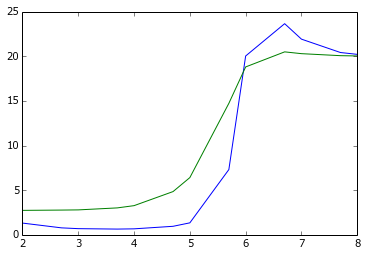

In [6]:
plot(log10(N), Tex_1)
plot(log10(N), Tex_2)